In [220]:
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
import numpy as np
import sympy as smp
import math

from typing import List, Callable

# Bernstein Polynomials
https://de.wikipedia.org/wiki/Bernsteinpolynom

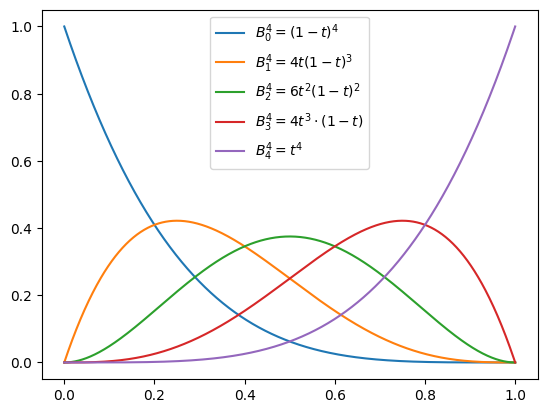

In [2]:
from sympy.abc import t

def bernstein_polynomials(degree: int):
    for i in range(degree+1):
        yield math.comb(degree, i)*t**i*(1-t)**(degree-i)

X = np.linspace(0,1,num=1000)
for i, B in enumerate(bernstein_polynomials(degree=4)):
    plt.plot(X, smp.lambdify(t, B)(X), label=f'$B^4_{i}={smp.latex(B)}$')

plt.legend()
plt.show()

## Uniform approximation of a function using Bernstein basis

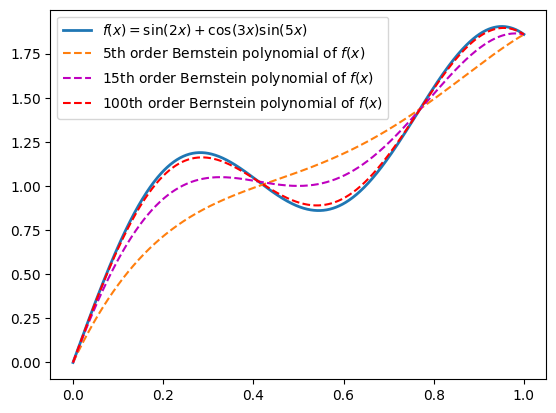

In [14]:
from sympy.abc import i

def bernstein_approx(f: Callable, n: int) -> Callable:
    B_n_ = [*bernstein_polynomials(degree=n)]
    return smp.lambdify(t, sum([B_n_[i] * f(i/n) for i in range(n+1)]))

f = lambda x: np.sin(2*x) + np.cos(3*x)*np.sin(5*x)

plt.plot(X, f(X), label='$f(x)=\sin(2x)+\cos(3x)\sin(5x)$', linewidth='2')

plt.plot(X, bernstein_approx(f, 5)(X), '--', label=f'{5}th order Bernstein polynomial of $f(x)$')
plt.plot(X, bernstein_approx(f, 15)(X), 'm--', label=f'{15}th order Bernstein polynomial of $f(x)$')
plt.plot(X, bernstein_approx(f, 100)(X), 'r--', label=f'{100}th order Bernstein polynomial of $f(x)$')

plt.legend()
plt.show()

# Bézier curves
https://de.wikipedia.org/wiki/B%C3%A9zierkurve

In [192]:
def bezier_curve(control_points: List) -> Callable:
    n = len(control_points)-1
    B_n_ = [*bernstein_polynomials(degree=n)]
    return smp.lambdify(t, sum([B_n_[i] * control_points[i] for i in range(n+1)]))

def plot_bezier(control_points: List): 
    plt.plot(X, bezier_curve(control_points)(X), c='tab:cyan')
    plt.plot(np.linspace(0, 1, num=len(control_points)), control_points, '--', c='tab:gray')
    plt.plot(np.linspace(0, 1, num=len(control_points)), control_points, 'o', c='tab:red')
    plt.show()

### 2D

In [341]:
rotate(0.25*np.pi, [0, 1, 1.5, -0.5])

[0.0, 1.1102230246251565e-16, 2.220446049250313e-16, -5.551115123125783e-17]

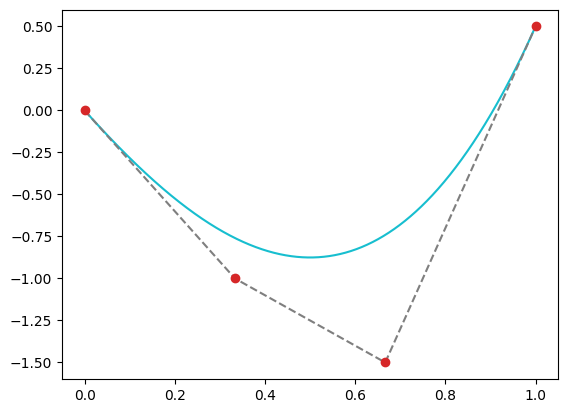

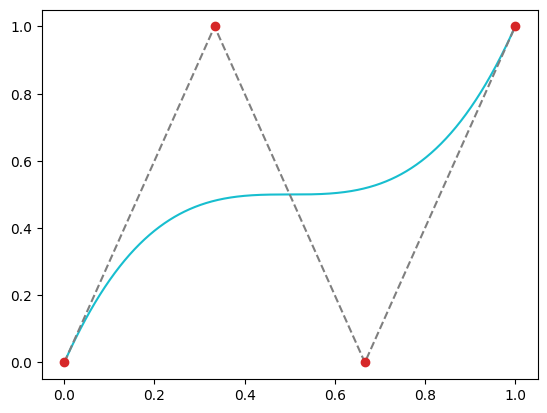

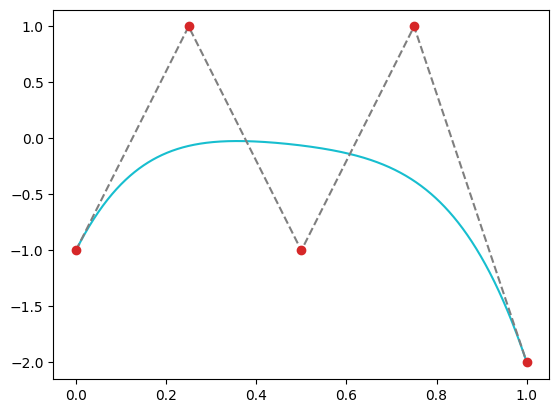

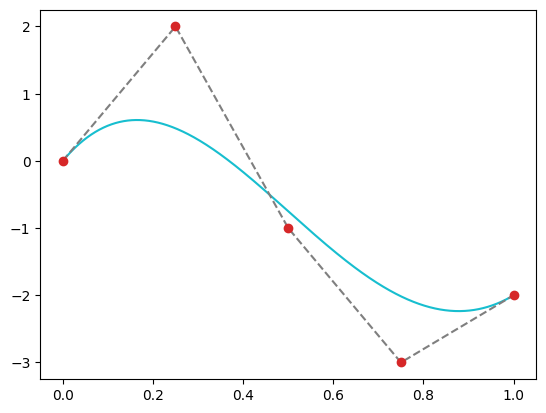

In [343]:
rotate = lambda theta, ctlpts: [*map(lambda x: -x*np.sin(theta) + x*np.cos(theta), ctlpts)] 

plot_bezier(rotate(np.pi, [0, 1, 1.5, -0.5]))
plot_bezier([0, 1, 0, 1])
plot_bezier([-1, 1, -1, 1, -2])
plot_bezier([0, 2, -1, -3, -2])

### 3D (Curve)

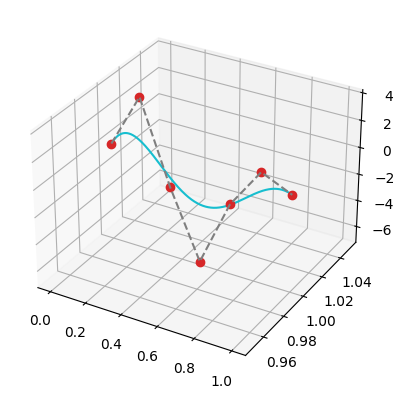

In [274]:
def plot_bezier_curve_3d(control_points):
    ax = plt.figure().add_subplot(projection='3d')
    ax.plot3D(X, np.ones(np.size(X)), bezier_curve(control_points)(X), c='tab:cyan')
    ax.plot3D(np.linspace(0,1,num=len(control_points)), np.ones(len(control_points)), control_points, 'o', c='tab:red')
    ax.plot3D(np.linspace(0,1,num=len(control_points)), np.ones(len(control_points)), control_points, '--', c='tab:gray')
    plt.show()

plot_bezier_curve_3d([0, 4, -2, -7, -2, 1, 0])

### 3D (Surface)

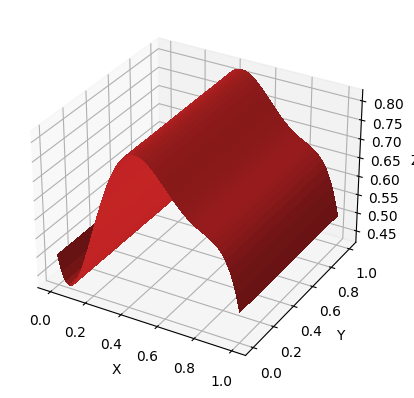

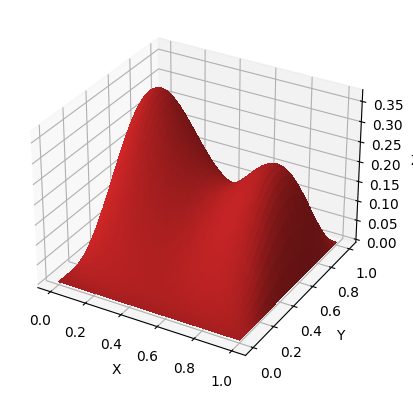

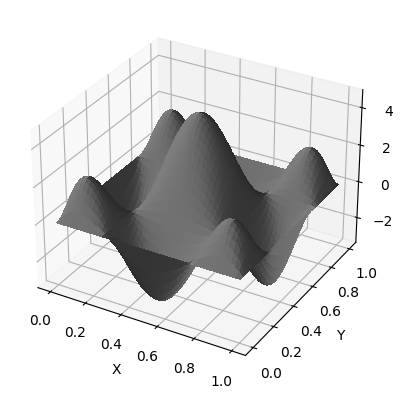

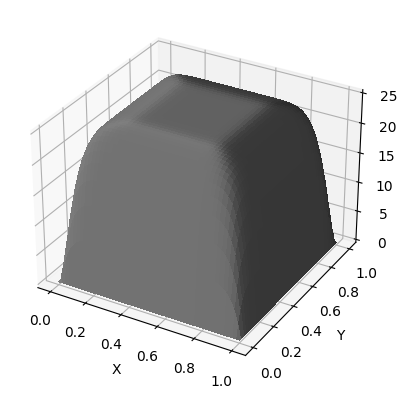

In [305]:
def plot_bezier_surface_3d(control_points, second_control_points=[1], radial=False):    
    ax = plt.figure().add_subplot(projection='3d')
    X_, Y = np.meshgrid(X, X)
    Z = bezier_curve(control_points)(X)
    if radial:
        ax.plot_surface(X_, Y, np.outer(Z, Z), antialiased=False, color='tab:gray')
    else:
        ax.plot_surface(X_, Y, np.outer(bezier_curve(second_control_points)(X), Z), antialiased=False, color='tab:red')
    ax.set(xlabel='X', ylabel='Y', zlabel='Z')
    plt.show()

plot_bezier_surface_3d([0.5, 0, 2, 0, 1, 0.5], radial=False)
plot_bezier_surface_3d([0, 2, -1.5, 1.5, 0], [0, 0, 0.5, 1, 0.5, 0], radial=False)
plot_bezier_surface_3d([0, 5, -2, -7, -2, 5, 0], radial=True)
plot_bezier_surface_3d([0, 10, 0, 10, 0, 10, 0, 10, 0, 10, 0], radial=True)

# B-Splines